In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter,FormatStrFormatter
import numpy as np

In [2]:
#read json
portfolio = pd.read_json(r'C:\Desktop\portfolio.json', orient='records', lines=True)
profile = pd.read_json(r'C:\Desktop\profile.json', orient='records', lines=True)
transcript = pd.read_json(r'C:\Desktop\transcript.json', orient='records', lines=True)

In [3]:
df=pd.DataFrame(transcript['value'].values.tolist(),index=transcript.index)

In [4]:
transcript=transcript.merge(df,left_index=True, right_index=True)

In [5]:
#one hot encode channels
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

channel = pd.DataFrame(mlb.fit_transform(portfolio['channels']),columns=mlb.classes_, index=portfolio.index)

In [6]:
portfolio=portfolio.merge(channel,left_index=True, right_index=True)

In [7]:
transcript=transcript.merge(portfolio, left_on='offer_id', right_on='id', how='left')

In [8]:
transcript=transcript.merge(profile, left_on='person', right_on='id', how='left')
transcript

,person,event,value,time,offer id,amount,offer_id,reward_x,reward_y,channels,...,id_x,email,mobile,social,web,gender,age,id_y,became_member_on,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,NaN,1.59,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,M,66,b3a1272bc9904337b331bf348c3e8c17,20180101,47000.0
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,NaN,9.53,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,M,52,68213b08d99a4ae1b0dcb72aebd9aa35,20180408,62000.0
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,NaN,3.61,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,F,63,a00058cf10334a308c68e7631c529907,20130922,52000.0
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,NaN,3.53,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,M,57,76ddbd6576844afe811f1a3c0fbb5bec,20160709,40000.0


In [15]:
#Rebinning into 5 groups
bins= [18,34,51,68,84,102]
labels = ['18-34','35-50','51-67','68-83','84-101']
transcript['age_group2']=pd.cut(transcript['age'], bins=bins, labels=labels,right=False)

In [16]:
transcript.groupby(['age_group2'])['amount'].sum()

age_group2
18-34     178459.88
35-50     392217.26
51-67     731384.84
68-83     348043.60
84-101     84836.82
Name: amount, dtype: float64

In [17]:
transcript.groupby(['age_group2'])['person'].nunique()

age_group2
18-34     2109
35-50     3584
51-67     5747
68-83     2724
84-101     661
Name: person, dtype: int64

In [18]:
tran=transcript.groupby(['age_group2','age'])['amount'].sum()/transcript.groupby(['age_group2','age'])['person'].nunique()
avg_spend_by_age=pd.DataFrame(tran).reset_index()
avg_spend_by_age.columns =['age_group2','age','avg_dollars_spent']
avg_spend_by_age

,age_group2,age,avg_dollars_spent
0,18-34,18,80.465286
1,18-34,19,71.889778
2,18-34,20,76.888148
3,18-34,21,98.846357
4,18-34,22,94.175725
...,...,...,...
420,84-101,98,74.076000
421,84-101,99,168.376000
422,84-101,100,169.395000
423,84-101,101,175.586000


In [23]:
tran=transcript.groupby(['age_group2','gender'])['amount'].sum()/transcript.groupby(['age_group2','gender'])['person'].nunique()
avg_spend_by_age=pd.DataFrame(tran).reset_index()
avg_spend_by_age.columns =['age_group2','gender','avg_dollars_spent']
avg_spend_by_age=avg_spend_by_age[avg_spend_by_age['gender']!='O']

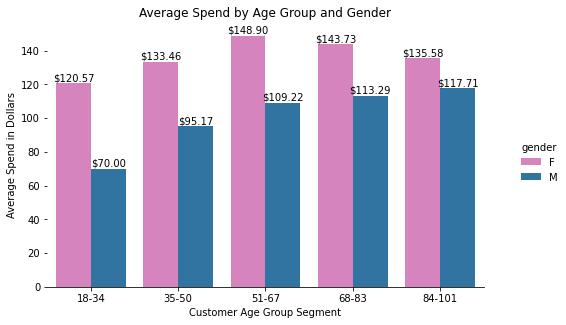

In [62]:
g = sns.catplot(
    data=avg_spend_by_age, kind="bar",
    x="age_group2", y="avg_dollars_spent", hue="gender",palette=sns.color_palette(['tab:pink', 'tab:blue']))
g.fig.set_size_inches(8, 5)
g.fig.subplots_adjust(top=0.81, right=0.86)

ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'${(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
g.despine(left=True)
g.set_axis_labels("")
g.set(xlabel = "Customer Age Group Segment",ylabel ="Average Spend in Dollars")
#g.legend.set_title("")
plt.title("Average Spend by Age Group and Gender")
plt.show()